<a href="https://colab.research.google.com/github/Abhy611/Image-Super-Resolution-GANS-/blob/main/GANs_031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Super Resolution GAN**

In [ ]:
# TensorFlow
import tensorflow as tf
import tensorflow_hub as hub

# Requests
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

**Load image**

In [ ]:
def download_image(url):

    content = requests.get(url).content
    image_array = np.asarray(bytearray(content), dtype=np.uint8)
    image = cv2.cvtColor(cv2.imdecode(image_array, -1), cv2.COLOR_BGR2RGB)

    return image

In [ ]:
def plot_image(image):
    plt.figure(figsize=(10,10))
    plt.title(image.shape)
    plt.imshow(image)
    plt.show()

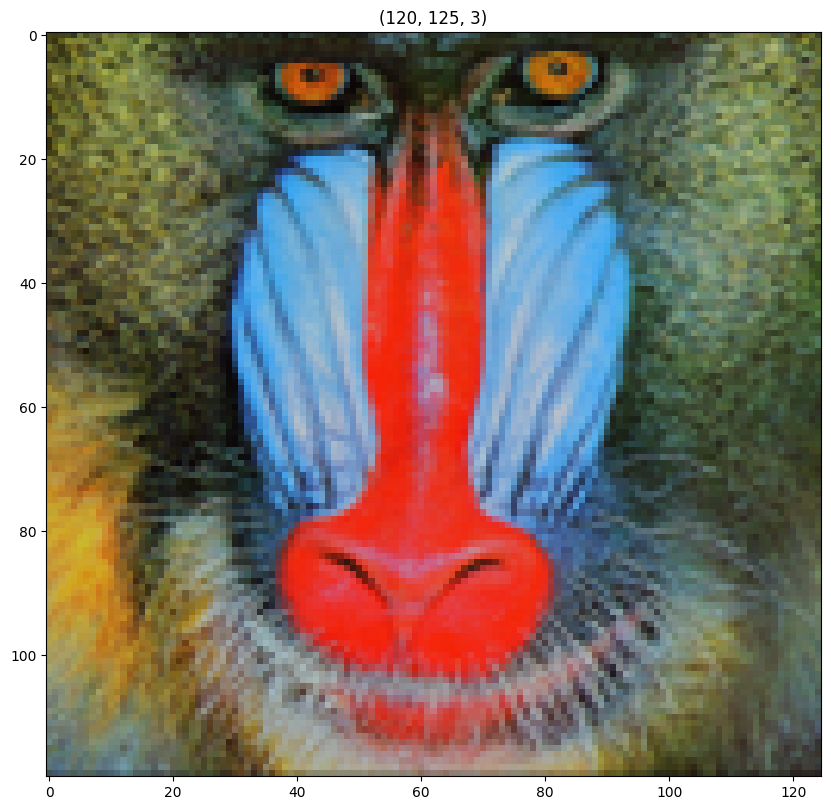

In [ ]:
url = "https://user-images.githubusercontent.com/12981474/40157448-eff91f06-5953-11e8-9a37-f6b5693fa03f.png"
test_image = download_image(url)
plot_image(test_image)

**Pre-process image**

In [ ]:
def preprocess_image(image):
    image_size = (tf.convert_to_tensor(test_image.shape[:-1]) // 4) * 4
    cropped_image = tf.image.crop_to_bounding_box(image, 0, 0, image_size[0], image_size[1])
    new_image = tf.cast(cropped_image, tf.float32)

    return tf.expand_dims(new_image, 0)

**Run model**

In [ ]:
def run(image):
    preprocessed_image = preprocess_image(image)
    new_image = model(preprocessed_image)
    return tf.squeeze(new_image) / 255.0

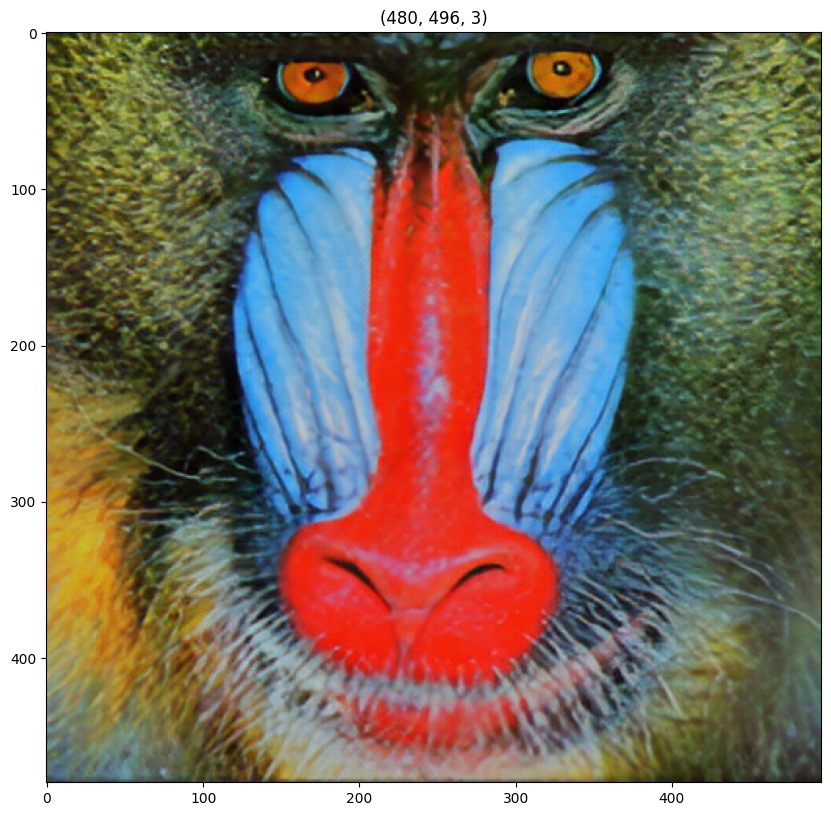

In [ ]:
fake_image = run(test_image)
plot_image(fake_image)

**Test model**

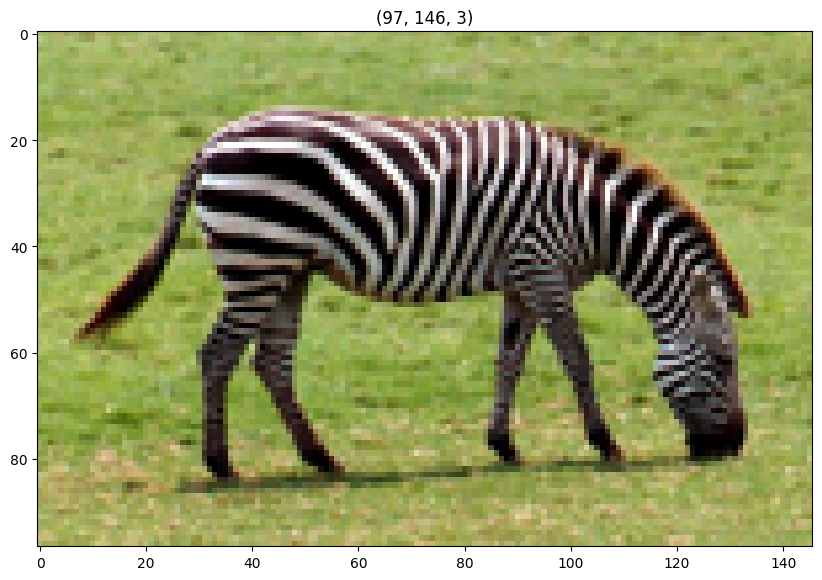

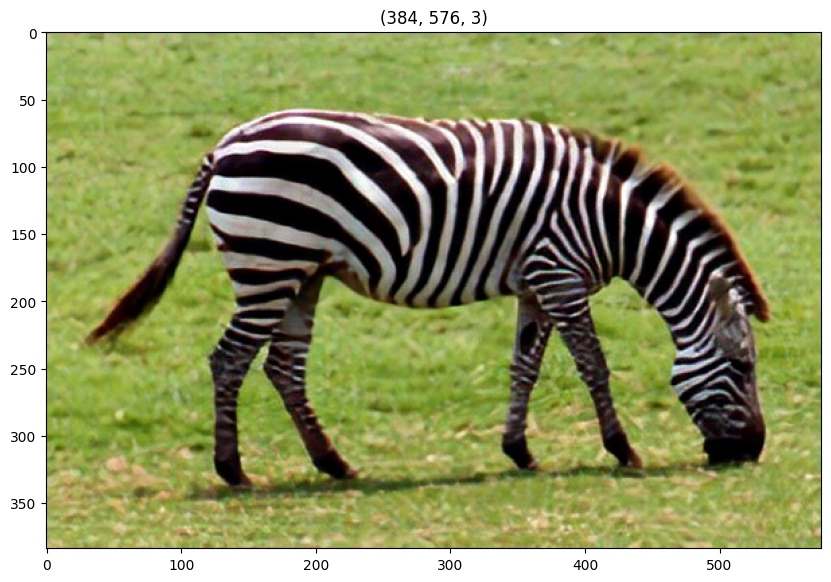

In [ ]:
url = "https://github.com/fenghansen/ESRGAN-Keras/blob/master/images/inputs/img_014_SRF_4_LR.png?raw=true"
test_image = download_image(url)
plot_image(test_image)
fake_image = run(test_image)
plot_image(fake_image)

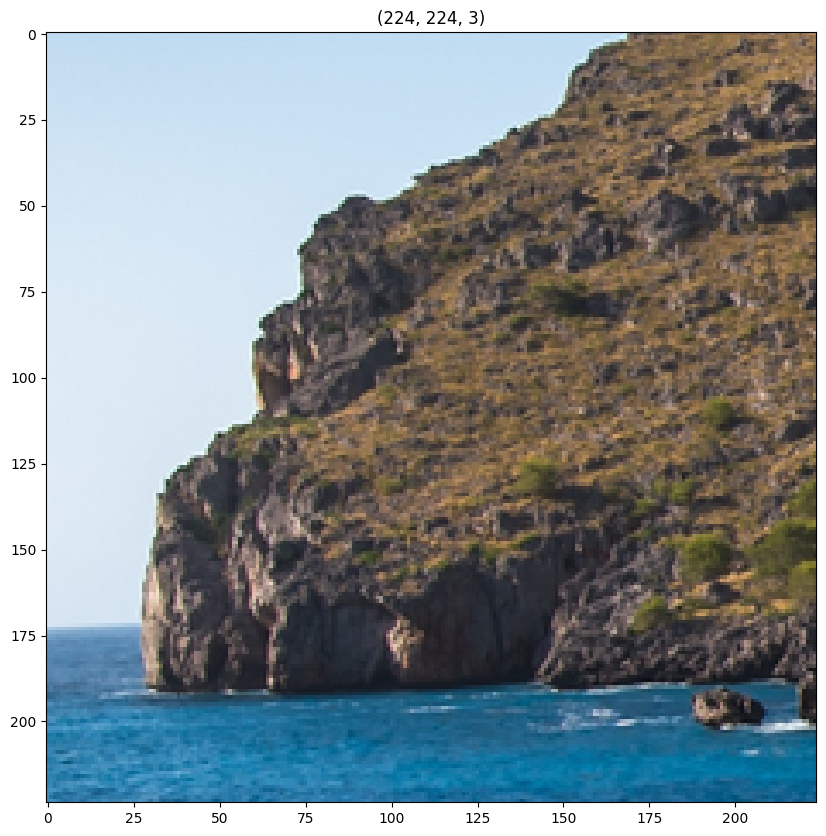

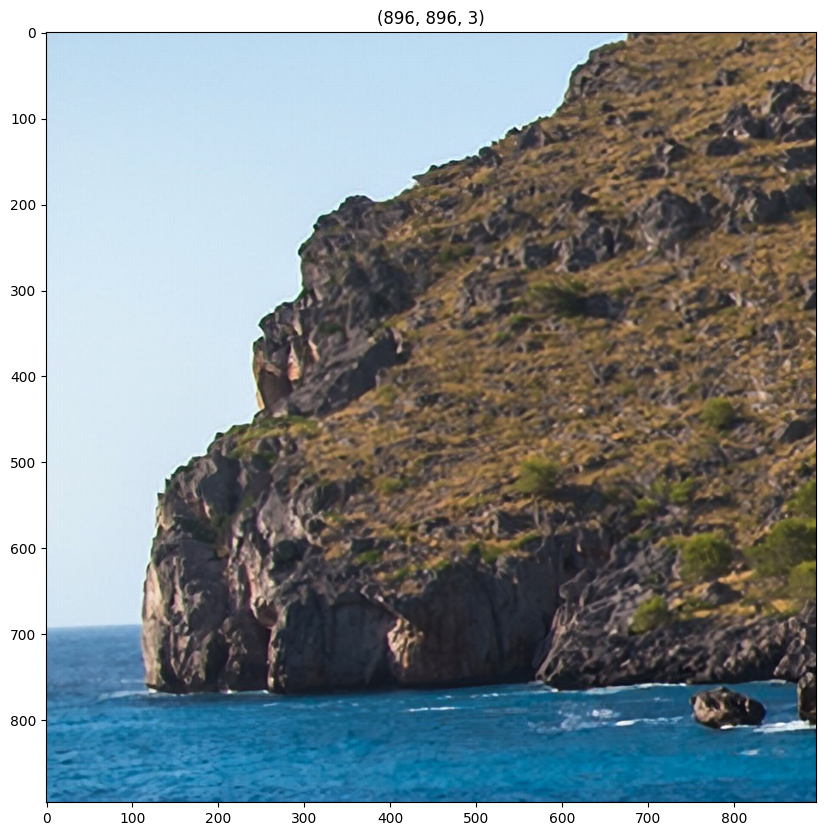

In [ ]:
url = "https://github.com/fenghansen/ESRGAN-Keras/blob/master/images/inputs/50-(2,2).png?raw=true"
test_image = download_image(url)
plot_image(test_image)
fake_image = run(test_image)
plot_image(fake_image)